Copyright (C) 2021  FeatSet+  

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.
 
This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

# MDS visualization

In [1]:
import sys
import random
import numpy as np
import pandas as pd
# import scipy
from scipy.spatial import distance
from sklearn.utils.validation import check_symmetric
from sklearn import manifold
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Load feature vectors of the current dataset

In [2]:
# Available FEMs
femNames = ['CL', 'CS', 'CT', 'EH', 'Hr', 'SC', 'TS', 'LBP', 'BIC', 'TCH', 'NCH8', 'NCH16', 'NCH32', 'NCH64', 'NCH128', 'NCH256']
# Input path (change this line accordingly)
path = 'featset+_csv/'

## Methods for computing the distance matrix and the MDS coordinates

In [3]:
###################################################################
# Generate distance matrixes
###################################################################
def computeDistanceMatrix(dfData):
    distanceMatrix = []
    for i in range(len(dfData)):
        distRow = []
        for j in range(len(dfData)):
            distRow.append(distance.euclidean(dfData.loc[i], dfData.loc[j]))

        distanceMatrix.append(distRow)
    
    return distanceMatrix

###################################################################
# Generate MDS coordinates
###################################################################
def getMDSCoordinates(distMat):
    # Fix matrixes
    npMat = distMat.to_numpy()
    dissimilarities = check_symmetric(npMat, raise_exception=False)

    mds_model = manifold.MDS(n_components = 2, random_state = 123, dissimilarity = 'precomputed')
    mds_fit = mds_model.fit(dissimilarities)
    mds_coords = mds_model.fit_transform(dissimilarities)

    return mds_coords

###################################################################
# Get random indexes
###################################################################
def getSampleIndexes(ntuples, sampleSizePercent):
    sample = random.sample(range(0, ntuples), round((ntuples * sampleSizePercent) / 100))
    return sample

def getSampleInstances(sampleIndexes, data):
    # Get features of only sample tuples
    a = data.loc[sampleIndexes]
    a.reset_index(inplace = True, drop = True)
    return a

## Load distance matrix and compute MDS coordinates

Processing features:
CL  CS  CT  EH  Hr  SC  TS  LBP  BIC  TCH  NCH8  NCH16  NCH32  NCH64  NCH128  NCH256  

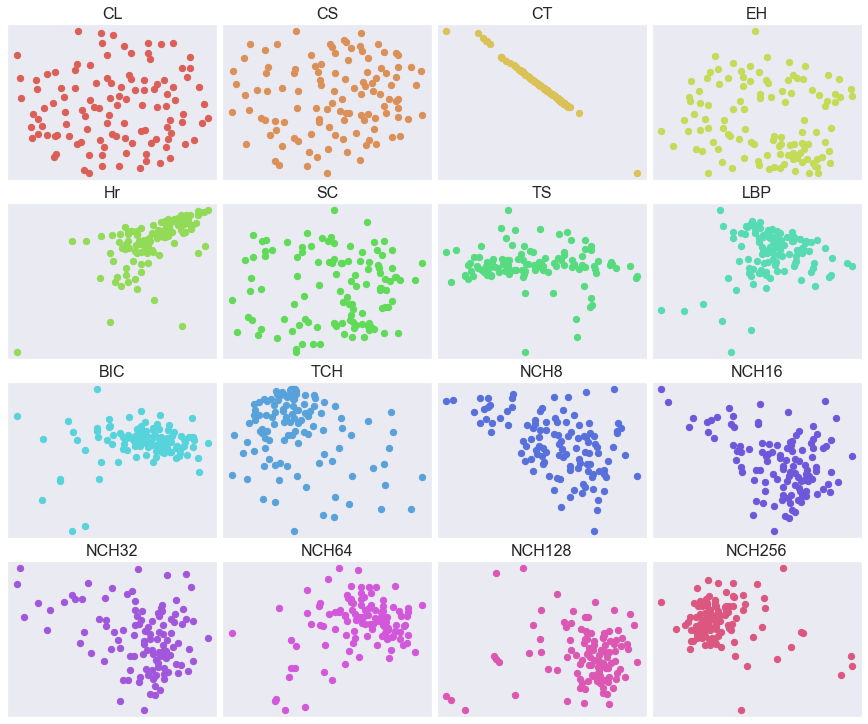

In [4]:
colors = sns.color_palette("hls", len(femNames))

# Dataset to visualize
ds = 'ds-BoWFire'

figure = plt.figure(figsize=[12, 10])
ax = figure.subplots()

print('Processing features:')

for i, fem in enumerate(femNames):
    
    plt.subplot(4, 4, i+1)
    print(fem, end='  ')
    
    dfData = pd.read_csv(path + str(ds) + '_' + str(fem) + '.csv', sep = ',')
    # Ignore first column (OID)
    dfData = dfData[dfData.columns[1:]]
    
    if (i == 0): # Generate the indexes only once, in the first iteration
        sampleIndexes = getSampleIndexes(len(dfData), 50)
    
    # Get data sample
    dfSample = getSampleInstances(sampleIndexes, dfData)
    # Compute distance matrix
    dfDistanceMatrix = pd.DataFrame(computeDistanceMatrix(dfSample))

    # Run MDS and get coordinates
    mds_coords = getMDSCoordinates(dfDistanceMatrix)

    plt.title(femNames[i], size=16)
    plt.scatter(mds_coords[:,0], mds_coords[:,1], facecolors = colors[i], s=40)

    plt.xticks([],size=6)
    plt.yticks([],size=6)
    ax.grid(True)

plt.tight_layout(pad=0.4)

plt.savefig('MDS-analysis.png', dpi=500)